In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preprocessing

In [2]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [3]:
df.isna().any()

Diabetes_012            False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

## Describe data

In [4]:
# trimmed mean
def trimmed_mean(series_array, trim_value):
    # ``` 
    # trim_value in percentages (0.1) 
    #              and less then 0.5
    # ```    
    sereis_array = np.sort(series_array)
    n = len(series_array)
    p = int(n*trim_value)
    trim = np.array(series_array)[p: n-p]
    t_m_result = trim.sum()/(n-2*p)
    return t_m_result

def variance(series):
    series = np.array(series)
    n = len(series)
    mean = np.mean(series)
    mse = sum(np.array([(x-mean)**2 for x in series]))/n
    return mse

def mean_deviation(series):
    series = np.array(series)
    mean = np.mean(series)
    md = np.mean(([(x-mean) for x in series]))
    return md

def mean_absolute_deviation(series):
    series = np.array(series)
    mean = np.mean(series)
    mad = np.mean(([np.abs((x-mean)) for x in series]))
    return mad


In [5]:
info_dataframe = pd.DataFrame({
    'mean': df.mean(),
    'trimmed mean': df.apply(lambda x: trimmed_mean(x, 0.4)),
    'median': df.median(),
    'variance': df.apply(lambda x: variance(x)),
    'standard deviation': df.std(),
    'mean deviation': df.apply(lambda x: mean_deviation(x)),
    'mean absolute deviation': df.apply(lambda x: mean_absolute_deviation(x))
})

info_dataframe.to_markdown('calculations.md')
info_dataframe.to_csv('calculations.csv')

## Scaling

### MinMax scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.set_output(transform = 'pandas')
minmax_standartized_df = scaler.fit_transform(df)
minmax_standartized_df.columns = df.columns
minmax_standartized_df.to_csv('cleaned_scaled_df.csv', index=True)
minmax_standartized_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.00,0.6,0.500000,1.0,0.0,0.666667,0.6,0.285714
1,0.0,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.50,0.0,0.000000,0.0,0.0,0.500000,1.0,0.000000
2,0.0,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.00,1.0,1.000000,1.0,0.0,0.666667,0.6,1.000000
3,0.0,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.833333,0.4,0.714286
4,0.0,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.000000,0.0,0.0,0.833333,0.8,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,0.383721,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.50,0.0,0.166667,0.0,1.0,0.333333,1.0,0.857143
253676,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.0,0.000000,1.0,0.0,0.833333,0.2,0.428571
253677,0.0,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.083333,0.8,0.142857
253678,0.0,1.0,0.0,1.0,0.127907,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.50,0.0,0.000000,0.0,1.0,0.500000,0.8,0.000000


### Mean normalisation scaling

In [7]:
def mean_normalization(series):
    series = np.array(series)
    std = np.std(series)
    mean = np.mean(series)
    mn_values = [(x-mean)/std for x in series]

    return pd.Series(mn_values)
    
normalized_df = df.apply(lambda x: mean_normalization(x))
normalized_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,-0.425292,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.322458,-1.762814,-1.316872,...,0.226863,-0.303173,2.329121,1.998592,1.233999,2.223615,-0.887021,0.316900,-1.065595,-1.474487
1,-0.425292,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.322458,0.567275,-1.316872,...,-4.407954,3.298445,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,-0.337933,0.963272,-2.440138
2,-0.425292,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,...,0.226863,3.298445,2.329121,3.617407,2.954590,2.223615,-0.887021,0.316900,-1.065595,0.939638
3,-0.425292,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.322458,0.567275,0.759375,...,0.226863,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733,-2.080028,-0.026012
4,-0.425292,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.322458,0.567275,0.759375,...,0.226863,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,-0.887021,0.971733,-0.051162,-0.991662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,-0.425292,1.153688,1.165254,0.196922,2.514516,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,...,0.226863,-0.303173,0.457294,-0.429630,0.086938,-0.449718,1.127369,-0.992766,0.963272,0.456813
253676,2.439387,1.153688,1.165254,0.196922,-1.571019,-0.892119,-0.205637,-0.322458,-1.762814,-1.316872,...,0.226863,-0.303173,1.393207,-0.429630,-0.486592,2.223615,-0.887021,0.971733,-3.094461,-0.991662
253677,-0.425292,-0.866785,-0.858182,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,0.567275,0.759375,...,0.226863,-0.303173,-1.414532,-0.429630,-0.486592,-0.449718,-0.887021,-1.975015,-0.051162,-1.957312
253678,-0.425292,1.153688,-0.858182,0.196922,-0.814438,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,...,0.226863,-0.303173,0.457294,-0.429630,-0.486592,-0.449718,1.127369,-0.337933,-0.051162,-2.440138


## Visualizations

In [8]:
import seaborn as sns

In [9]:
print(df[['BMI', 'Age']])

         BMI   Age
0       40.0   9.0
1       25.0   7.0
2       28.0   9.0
3       27.0  11.0
4       24.0  11.0
...      ...   ...
253675  45.0   5.0
253676  18.0  11.0
253677  28.0   2.0
253678  23.0   7.0
253679  25.0   9.0

[253680 rows x 2 columns]


FileNotFoundError: [Errno 2] No such file or directory: 'images/Body_Mass_for_Ages.png'

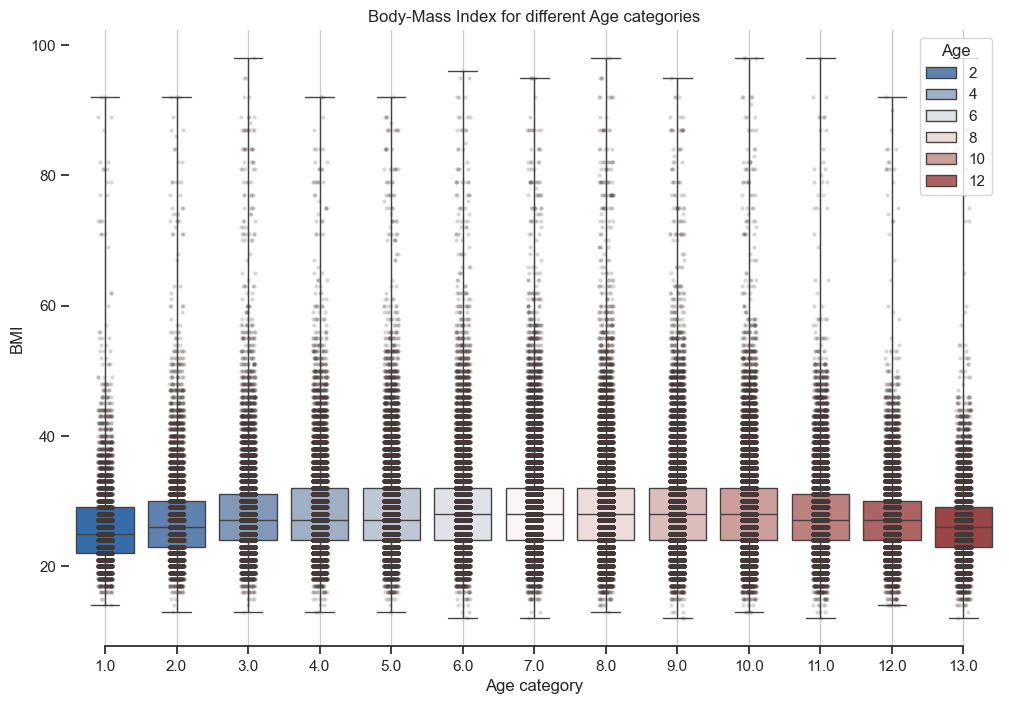

In [10]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(12, 8))
sns.stripplot(df[['Age', 'BMI']], x="Age", y="BMI", size=3, color="#453838", jitter=True, alpha=0.2)

sns.boxplot(
    df[['Age', 'BMI']], x="Age", y="BMI", hue='Age',
    whis=[0, 100], width=.8, palette="vlag", 
)


# Tweak the visual presentation
ax.set_title("Body-Mass Index for different Age categories")
ax.xaxis.grid(True)
ax.set(ylabel="BMI", xlabel='Age category')
sns.despine(trim=True, left=True)
plt.savefig('images/Body_Mass_for_Ages.png')

In [ ]:
sns.set_theme(style="ticks")
boolean_data = df[['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex']]


f, ax = plt.subplots(figsize=(12, 8))

# Count the occurrences of 0 and 1 for each boolean column
counts = boolean_data.apply(lambda col: col.value_counts()).T
counts = counts.reset_index().melt(id_vars='index', var_name='Value', value_name='Count')

# Plot using barplot
sns.barplot(data=counts, x='index', y='Count', hue='Value')
ax.set_title("Participants analysis")
ax.set(xlabel='', ylabel='Count')
plt.xticks(rotation=30)
plt.savefig('images/Participants_answers_analysis.png')

In [ ]:
sns.set_theme(style="ticks")
scatter_data = df[['Diabetes_012', 'Education', 'Income']]

sns.catplot(
    data=scatter_data, x="Education", y="Income", hue="Diabetes_012",
    native_scale=True, zorder=1, alpha=0.3
)
sns.regplot(
    data=scatter_data, x="Education", y="Income",
    scatter=False, truncate=False, order=2, color=".2",
)

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))

sns.set_theme(style="ticks")
scatter_data = df[['MentHlth', 'GenHlth', 'HvyAlcoholConsump']]

sns.violinplot(data=scatter_data, x="GenHlth", y="MentHlth", hue="HvyAlcoholConsump",
               split=True, inner="quart", fill=False,
               palette={1.0: "g", 0.0: ".35"})


ax.set_title("Mental to General health distribution")
ax.set(ylabel='Days of not good mental health for last 30 days')
plt.savefig('images/Mental_to_General_health_distribution.png')